# datetime type and tools

In [2]:
from datetime import datetime
now=datetime.now()
now

datetime.datetime(2020, 8, 11, 3, 48, 8, 752530)

In [4]:
now.year,now.month,now.day

(2020, 8, 11)

In [12]:
delta=datetime(2011,8,11)-datetime(2008,11,12,22,5,56,12212)
delta

datetime.timedelta(days=1001, seconds=6843, microseconds=987788)

In [13]:
delta.days

1001

In [14]:
delta.seconds

6843

1.datetime:A combination of date and tim,.Attribute: year,month,day,hour ,minute,second,microsecond
2.timedelta:A duration expressing difference between two time,date or datetime

In [16]:
from datetime import timedelta
timedelta(12)

datetime.timedelta(days=12)

In [17]:
datetime(2012,1,1)+timedelta(12)

datetime.datetime(2012, 1, 13, 0, 0)

In [18]:
start=datetime(2012,1,1)

In [19]:
start-2*timedelta(12)

datetime.datetime(2011, 12, 8, 0, 0)

# Converting between datetime and string

In [24]:
stamp=datetime(2011,5,14)
date=str(stamp)
date

'2011-05-14 00:00:00'

In [25]:
stamp.strftime('%Y-%m-%d')

'2011-05-14'

In [27]:
value='2012-12-15'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2012, 12, 15, 0, 0)

In [29]:
values='2012/12/15'
datetime.strptime(values,'%Y/%m/%d')

datetime.datetime(2012, 12, 15, 0, 0)

In [33]:
type(values)

str

In [32]:
import pandas as pd
date=pd.to_datetime(value)
date

Timestamp('2012-12-15 00:00:00')

In [34]:
#timesstamp is the pandas module equivalent to pythons datetime
type(date)

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
datestr=['7/6/2011','8/6/2011']
x=[datetime.strptime(date,'%m/%d/%Y') for date in datestr]
x

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [2]:
from dateutil.parser import parse
date=parse('2011/01/03')
date

datetime.datetime(2011, 1, 3, 0, 0)

In [38]:
date.day

3

In [39]:
dates=parse('2011/01/03',dayfirst=True)
dates

datetime.datetime(2011, 3, 1, 0, 0)

In [40]:
datestr=['2011-07-06 12:00:00','2011-08-06 00:00:00']
pd.to_datetime(datestr)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [44]:
datestrn=datestr+[None]


In [47]:
datestrn

['2011-07-06 12:00:00', '2011-08-06 00:00:00', None, None]

In [49]:
idx=pd.to_datetime(datestrn)
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT', 'NaT'], dtype='datetime64[ns]', freq=None)

In [50]:
#Nat--> Not a time
idx[2:]

DatetimeIndex(['NaT', 'NaT'], dtype='datetime64[ns]', freq=None)

In [51]:
pd.isnull(idx)

array([False, False,  True,  True])

In [4]:
#parse date is usefull but incomplete
# we can see it here
parse('47')

datetime.datetime(2047, 8, 11, 0, 0)

# Basic Time Series

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
dates=[datetime(2011,4,1),datetime(2010,3,5),datetime(2008,2,1),datetime(2005,6,25)\
       ,datetime(2009,11,2),datetime(2014,5,6)]
ts=pd.Series(np.random.randn(6),index=dates)
ts

2011-04-01   -0.241092
2010-03-05   -0.113415
2008-02-01   -0.667987
2005-06-25    0.377028
2009-11-02   -0.537397
2014-05-06   -0.669633
dtype: float64

In [12]:
ts.index

DatetimeIndex(['2011-04-01', '2010-03-05', '2008-02-01', '2005-06-25',
               '2009-11-02', '2014-05-06'],
              dtype='datetime64[ns]', freq=None)

In [16]:
ts

2011-04-01   -0.241092
2010-03-05   -0.113415
2008-02-01   -0.667987
2005-06-25    0.377028
2009-11-02   -0.537397
2014-05-06   -0.669633
dtype: float64

In [14]:
ts[::2]

2011-04-01   -0.241092
2008-02-01   -0.667987
2009-11-02   -0.537397
dtype: float64

In [15]:
ts+ts[::2]

2005-06-25         NaN
2008-02-01   -1.335973
2009-11-02   -1.074793
2010-03-05         NaN
2011-04-01   -0.482184
2014-05-06         NaN
dtype: float64

In [17]:
ts.index.dtype

dtype('<M8[ns]')

# Indexing Selection Subsetting

In [19]:
stamp=ts.index[0]
stamp

Timestamp('2011-04-01 00:00:00')

In [20]:
stamp=ts.index[2]
stamp

Timestamp('2008-02-01 00:00:00')

In [22]:
ts[stamp]

-0.6679865754494442

In [25]:
ts['02/01/2008']

2008-02-01   -0.667987
dtype: float64

In [27]:
ts['20080201']

2008-02-01   -0.667987
dtype: float64

In [31]:
longer_ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
longer_ts

2000-01-01   -1.658001
2000-01-02   -0.724527
2000-01-03   -0.091369
2000-01-04    1.232222
2000-01-05   -0.297972
                ...   
2002-09-22   -0.735761
2002-09-23   -0.187159
2002-09-24    1.381668
2002-09-25    0.607638
2002-09-26    0.328863
Freq: D, Length: 1000, dtype: float64

In [32]:
longer_ts['2001']

2001-01-01   -1.070365
2001-01-02    1.211229
2001-01-03   -0.773707
2001-01-04    2.017410
2001-01-05    0.057316
                ...   
2001-12-27    1.380578
2001-12-28   -0.057621
2001-12-29    2.190633
2001-12-30    0.785317
2001-12-31    0.137564
Freq: D, Length: 365, dtype: float64

In [33]:
longer_ts['2001-05']

2001-05-01    0.728287
2001-05-02   -0.041311
2001-05-03    0.852774
2001-05-04   -2.592191
2001-05-05   -0.078592
2001-05-06   -0.357951
2001-05-07    0.703172
2001-05-08    1.106556
2001-05-09   -0.916921
2001-05-10   -0.453951
2001-05-11   -1.705365
2001-05-12   -1.498884
2001-05-13   -0.216515
2001-05-14   -1.887784
2001-05-15   -0.527031
2001-05-16    0.469099
2001-05-17    0.388654
2001-05-18   -0.475004
2001-05-19   -1.095629
2001-05-20    1.123002
2001-05-21    0.544402
2001-05-22   -0.100432
2001-05-23   -0.694161
2001-05-24   -0.597845
2001-05-25    0.052429
2001-05-26   -0.331981
2001-05-27    0.415914
2001-05-28   -1.152416
2001-05-29    1.223827
2001-05-30   -0.454264
2001-05-31    2.144626
Freq: D, dtype: float64

In [34]:
longer_ts['2001-05-30']

-0.45426377055960043

In [35]:
ts

2011-04-01   -0.241092
2010-03-05   -0.113415
2008-02-01   -0.667987
2005-06-25    0.377028
2009-11-02   -0.537397
2014-05-06   -0.669633
dtype: float64

In [38]:
ts[datetime(2008,2,1):]

2008-02-01   -0.667987
2005-06-25    0.377028
2009-11-02   -0.537397
2014-05-06   -0.669633
dtype: float64

In [39]:
ts['2008-02-01':'2009-11-02']

2008-02-01   -0.667987
2009-11-02   -0.537397
dtype: float64

In [43]:
dte=[datetime(2008,1,3),datetime(2008,2,3),datetime(2008,3,3),datetime(2008,4,3),datetime(2008,5,3),datetime(2008,6,3)]
ts1=pd.Series(np.random.randn(6),index=dte)
ts1

2008-01-03    1.093812
2008-02-03    2.800985
2008-03-03    0.909142
2008-04-03    1.359483
2008-05-03   -1.053961
2008-06-03    0.193113
dtype: float64

In [44]:
ts1.truncate(after='3/25/2008')

2008-01-03    1.093812
2008-02-03    2.800985
2008-03-03    0.909142
dtype: float64

In [48]:
datess=pd.date_range('1-1-2001',periods=100,freq='W-WED')
df=pd.DataFrame(np.random.randn(100,4),index=datess,columns=['colorado','texas','New York','ohio'])

In [49]:
df

,colorado,texas,New York,ohio
2001-01-03,-1.825560,0.082049,0.044298,0.978776
2001-01-10,-0.820662,2.625405,-1.726568,1.053613
2001-01-17,2.515611,0.196262,0.266782,1.189793
2001-01-24,0.817008,0.470109,0.883427,-0.716029
2001-01-31,-0.443574,-0.767987,1.052419,0.110515
...,...,...,...,...
2002-10-30,2.995805,-0.706335,1.705088,1.080150
2002-11-06,-1.010016,-0.848294,0.800039,-0.120534
2002-11-13,0.690832,0.038363,0.496558,0.123541
2002-11-20,0.100415,0.157857,-0.400015,1.166975


In [53]:
ds=pd.date_range('2000-1-1',periods=100,freq='D')
df1=pd.DataFrame(np.random.randn(100,4),index=ds,columns=['colorado','texas','New York','ohio'])

In [54]:
df1

,colorado,texas,New York,ohio
2000-01-01,0.572221,-0.680910,0.460795,0.637185
2000-01-02,0.563927,1.761316,-0.314161,0.585951
2000-01-03,1.317396,0.382576,-0.007718,3.051203
2000-01-04,0.249899,0.507347,-0.031837,-1.972507
2000-01-05,-0.993445,-0.233279,0.080263,-1.555915
...,...,...,...,...
2000-04-05,0.379484,0.895976,1.505384,-0.172176
2000-04-06,0.916759,-0.931267,-0.088481,0.496320
2000-04-07,0.396665,1.405069,1.166665,0.055034
2000-04-08,2.232194,0.955564,0.719569,-1.462668


# Time Series With Duplicate Indices

In [2]:
import numpy as np
import pandas as pd
dats=pd.DatetimeIndex(['1/1/2001','1/2/2001','1/2/2001','1/3/2001','1/5/2001'])
ts=pd.Series(np.random.randn(5),index=dats)
ts

2001-01-01   -0.866450
2001-01-02   -1.249608
2001-01-02    0.114655
2001-01-03   -0.655298
2001-01-05    1.761765
dtype: float64

In [62]:
ts.index.is_unique

False

In [63]:
ts['1/5/2001']

-0.9158672780855572

In [64]:
ts['1/2/2001']

2001-01-02   -0.163758
2001-01-02   -0.863890
dtype: float64

In [65]:
ts.groupby(level=0)

In [66]:
ts.groupby(level=0).mean()

2001-01-01    0.069878
2001-01-02   -0.513824
2001-01-03    0.581894
2001-01-05   -0.915867
dtype: float64

In [67]:
ts.groupby(level=0).count()

2001-01-01    1
2001-01-02    2
2001-01-03    1
2001-01-05    1
dtype: int64

In [4]:
ts2=pd.Series([2,2,5,6,5],index=dats)
ts2

2001-01-01    2
2001-01-02    2
2001-01-02    5
2001-01-03    6
2001-01-05    5
dtype: int64

In [6]:
ts2.groupby(level=0).count()

2001-01-01    1
2001-01-02    2
2001-01-03    1
2001-01-05    1
dtype: int64

# Date Ranges,frequencies and shifting

In [8]:
ts

2001-01-01   -0.866450
2001-01-02   -1.249608
2001-01-02    0.114655
2001-01-03   -0.655298
2001-01-05    1.761765
dtype: float64

In [9]:
resampler=ts.resample('D')

In [10]:
resampler

In [13]:
pd.date_range('2/1/2000',periods=100)

DatetimeIndex(['2000-02-01', '2000-02-02', '2000-02-03', '2000-02-04',
               '2000-02-05', '2000-02-06', '2000-02-07', '2000-02-08',
               '2000-02-09', '2000-02-10', '2000-02-11', '2000-02-12',
               '2000-02-13', '2000-02-14', '2000-02-15', '2000-02-16',
               '2000-02-17', '2000-02-18', '2000-02-19', '2000-02-20',
               '2000-02-21', '2000-02-22', '2000-02-23', '2000-02-24',
               '2000-02-25', '2000-02-26', '2000-02-27', '2000-02-28',
               '2000-02-29', '2000-03-01', '2000-03-02', '2000-03-03',
               '2000-03-04', '2000-03-05', '2000-03-06', '2000-03-07',
               '2000-03-08', '2000-03-09', '2000-03-10', '2000-03-11',
               '2000-03-12', '2000-03-13', '2000-03-14', '2000-03-15',
               '2000-03-16', '2000-03-17', '2000-03-18', '2000-03-19',
               '2000-03-20', '2000-03-21', '2000-03-22', '2000-03-23',
               '2000-03-24', '2000-03-25', '2000-03-26', '2000-03-27',
      

In [14]:
pd.date_range('3/1/2000','4/1/2000')

DatetimeIndex(['2000-03-01', '2000-03-02', '2000-03-03', '2000-03-04',
               '2000-03-05', '2000-03-06', '2000-03-07', '2000-03-08',
               '2000-03-09', '2000-03-10', '2000-03-11', '2000-03-12',
               '2000-03-13', '2000-03-14', '2000-03-15', '2000-03-16',
               '2000-03-17', '2000-03-18', '2000-03-19', '2000-03-20',
               '2000-03-21', '2000-03-22', '2000-03-23', '2000-03-24',
               '2000-03-25', '2000-03-26', '2000-03-27', '2000-03-28',
               '2000-03-29', '2000-03-30', '2000-03-31', '2000-04-01'],
              dtype='datetime64[ns]', freq='D')

In [15]:
pd.date_range(start='3/1/2000',periods=20)

DatetimeIndex(['2000-03-01', '2000-03-02', '2000-03-03', '2000-03-04',
               '2000-03-05', '2000-03-06', '2000-03-07', '2000-03-08',
               '2000-03-09', '2000-03-10', '2000-03-11', '2000-03-12',
               '2000-03-13', '2000-03-14', '2000-03-15', '2000-03-16',
               '2000-03-17', '2000-03-18', '2000-03-19', '2000-03-20'],
              dtype='datetime64[ns]', freq='D')

In [16]:
pd.date_range(end='8/16/2000',periods=20)

DatetimeIndex(['2000-07-28', '2000-07-29', '2000-07-30', '2000-07-31',
               '2000-08-01', '2000-08-02', '2000-08-03', '2000-08-04',
               '2000-08-05', '2000-08-06', '2000-08-07', '2000-08-08',
               '2000-08-09', '2000-08-10', '2000-08-11', '2000-08-12',
               '2000-08-13', '2000-08-14', '2000-08-15', '2000-08-16'],
              dtype='datetime64[ns]', freq='D')

In [17]:
pd.date_range(end='8/16/2000',periods=20,freq='BM')

DatetimeIndex(['1998-12-31', '1999-01-29', '1999-02-26', '1999-03-31',
               '1999-04-30', '1999-05-31', '1999-06-30', '1999-07-30',
               '1999-08-31', '1999-09-30', '1999-10-29', '1999-11-30',
               '1999-12-31', '2000-01-31', '2000-02-29', '2000-03-31',
               '2000-04-28', '2000-05-31', '2000-06-30', '2000-07-31'],
              dtype='datetime64[ns]', freq='BM')

In [18]:
pd.date_range(end='8/16/2000',periods=20,freq='s')

DatetimeIndex(['2000-08-15 23:59:41', '2000-08-15 23:59:42',
               '2000-08-15 23:59:43', '2000-08-15 23:59:44',
               '2000-08-15 23:59:45', '2000-08-15 23:59:46',
               '2000-08-15 23:59:47', '2000-08-15 23:59:48',
               '2000-08-15 23:59:49', '2000-08-15 23:59:50',
               '2000-08-15 23:59:51', '2000-08-15 23:59:52',
               '2000-08-15 23:59:53', '2000-08-15 23:59:54',
               '2000-08-15 23:59:55', '2000-08-15 23:59:56',
               '2000-08-15 23:59:57', '2000-08-15 23:59:58',
               '2000-08-15 23:59:59', '2000-08-16 00:00:00'],
              dtype='datetime64[ns]', freq='S')

In [19]:
pd.date_range('2000-08-16 05:56:32',periods=5)

DatetimeIndex(['2000-08-16 05:56:32', '2000-08-17 05:56:32',
               '2000-08-18 05:56:32', '2000-08-19 05:56:32',
               '2000-08-20 05:56:32'],
              dtype='datetime64[ns]', freq='D')

In [20]:
pd.date_range('2000-08-16 05:56:32',periods=5,normalize=True)

DatetimeIndex(['2000-08-16', '2000-08-17', '2000-08-18', '2000-08-19',
               '2000-08-20'],
              dtype='datetime64[ns]', freq='D')

In [22]:
pd.date_range('1/1/2008','2/1/2008',freq='4h')

DatetimeIndex(['2008-01-01 00:00:00', '2008-01-01 04:00:00',
               '2008-01-01 08:00:00', '2008-01-01 12:00:00',
               '2008-01-01 16:00:00', '2008-01-01 20:00:00',
               '2008-01-02 00:00:00', '2008-01-02 04:00:00',
               '2008-01-02 08:00:00', '2008-01-02 12:00:00',
               ...
               '2008-01-30 12:00:00', '2008-01-30 16:00:00',
               '2008-01-30 20:00:00', '2008-01-31 00:00:00',
               '2008-01-31 04:00:00', '2008-01-31 08:00:00',
               '2008-01-31 12:00:00', '2008-01-31 16:00:00',
               '2008-01-31 20:00:00', '2008-02-01 00:00:00'],
              dtype='datetime64[ns]', length=187, freq='4H')

In [23]:
pd.date_range('1/1/2008','2/1/2008',freq='1h30min')

DatetimeIndex(['2008-01-01 00:00:00', '2008-01-01 01:30:00',
               '2008-01-01 03:00:00', '2008-01-01 04:30:00',
               '2008-01-01 06:00:00', '2008-01-01 07:30:00',
               '2008-01-01 09:00:00', '2008-01-01 10:30:00',
               '2008-01-01 12:00:00', '2008-01-01 13:30:00',
               ...
               '2008-01-31 10:30:00', '2008-01-31 12:00:00',
               '2008-01-31 13:30:00', '2008-01-31 15:00:00',
               '2008-01-31 16:30:00', '2008-01-31 18:00:00',
               '2008-01-31 19:30:00', '2008-01-31 21:00:00',
               '2008-01-31 22:30:00', '2008-02-01 00:00:00'],
              dtype='datetime64[ns]', length=497, freq='90T')

Weak of month dates

In [26]:
rng=pd.date_range('2001-02-01','2002-06-01',freq='WOM-3FRI')

In [27]:
rng

DatetimeIndex(['2001-02-16', '2001-03-16', '2001-04-20', '2001-05-18',
               '2001-06-15', '2001-07-20', '2001-08-17', '2001-09-21',
               '2001-10-19', '2001-11-16', '2001-12-21', '2002-01-18',
               '2002-02-15', '2002-03-15', '2002-04-19', '2002-05-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [28]:
list(rng)

[Timestamp('2001-02-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2001-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2001-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2001-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2001-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2001-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2001-08-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2001-09-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2001-10-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2001-11-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2001-12-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2002-01-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2002-02-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2002-03-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2002-04-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2002-05-17 00:00:00', freq='WOM-3FRI')]

# Shifting(Leading or Lagging) data

In [32]:
ts3=pd.Series(np.random.rand(4),index=pd.date_range('2000-01-01',periods=4,freq='M'))
ts3

2000-01-31    0.990645
2000-02-29    0.874032
2000-03-31    0.415575
2000-04-30    0.224110
Freq: M, dtype: float64

In [33]:
ts3.shift(1)

2000-01-31         NaN
2000-02-29    0.990645
2000-03-31    0.874032
2000-04-30    0.415575
Freq: M, dtype: float64

In [34]:
ts3.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.990645
2000-04-30    0.874032
Freq: M, dtype: float64

In [37]:
ts3.shift(-2)

2000-01-31    0.415575
2000-02-29    0.224110
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [39]:
ts3

2000-01-31    0.990645
2000-02-29    0.874032
2000-03-31    0.415575
2000-04-30    0.224110
Freq: M, dtype: float64

In [42]:
ts3.shift(2,freq='M')

2000-03-31    0.990645
2000-04-30    0.874032
2000-05-31    0.415575
2000-06-30    0.224110
Freq: M, dtype: float64

In [48]:
ts3.shift(3)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31         NaN
2000-04-30    0.990645
Freq: M, dtype: float64

In [52]:
ts3

2000-01-31    0.990645
2000-02-29    0.874032
2000-03-31    0.415575
2000-04-30    0.224110
Freq: M, dtype: float64

In [51]:
#shift(3,freq=D)--> each index+3D
#such as 2000-01-31+3D=2000-02-03
ts3.shift(3,freq='D')

2000-02-03    0.990645
2000-03-03    0.874032
2000-04-03    0.415575
2000-05-03    0.224110
dtype: float64

In [54]:
#shift(2,freq='90T')-->2000-01-31+2*90T=2000-01-31 03::00::00
ts3.shift(2,freq='90T')

2000-01-31 03:00:00    0.990645
2000-02-29 03:00:00    0.874032
2000-03-31 03:00:00    0.415575
2000-04-30 03:00:00    0.224110
Freq: M, dtype: float64

In [55]:
#shift(3,90T)-->2000-01-31+3*90T=2000-01-31 04::30::00
ts3.shift(3,freq='90T')

2000-01-31 04:30:00    0.990645
2000-02-29 04:30:00    0.874032
2000-03-31 04:30:00    0.415575
2000-04-30 04:30:00    0.224110
Freq: M, dtype: float64

    shifting dates with offset

In [95]:
from pandas.tseries.offsets import Day,MonthEnd,Hour
from datetime import datetime

In [30]:
now=datetime(2011,11,17)
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [31]:
now+Day(3)

Timestamp('2011-11-20 00:00:00')

In [32]:
now+MonthEnd(1)

Timestamp('2011-11-30 00:00:00')

In [33]:
now-MonthEnd(1)

Timestamp('2011-10-31 00:00:00')

In [34]:
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [35]:
offset=MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [36]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [37]:
now

datetime.datetime(2011, 11, 17, 0, 0)

In [42]:
import pandas as pd 
import numpy as np
rs=pd.Series(np.random.randn(20),index=pd.date_range('1/15/2000',periods=20,freq='4d'))
rs

2000-01-15   -1.396101
2000-01-19   -0.007814
2000-01-23   -0.314470
2000-01-27    0.379247
2000-01-31    1.681970
2000-02-04    0.182724
2000-02-08    0.453444
2000-02-12    0.747644
2000-02-16   -0.560379
2000-02-20    1.223230
2000-02-24   -0.000040
2000-02-28    0.697475
2000-03-03   -1.493338
2000-03-07    0.033288
2000-03-11   -0.377068
2000-03-15    0.407432
2000-03-19   -0.661573
2000-03-23    1.746178
2000-03-27   -0.158861
2000-03-31   -1.419478
Freq: 4D, dtype: float64

In [43]:
rs.groupby(offset.rollforward).mean()

2000-01-31    0.068566
2000-02-29    0.392014
2000-03-31   -0.240427
dtype: float64

In [45]:
rs.resample('M').mean()

2000-01-31    0.068566
2000-02-29    0.392014
2000-03-31   -0.240427
Freq: M, dtype: float64

In [46]:
rs.resample('W').mean()

2000-01-16   -1.396101
2000-01-23   -0.161142
2000-01-30    0.379247
2000-02-06    0.932347
2000-02-13    0.600544
2000-02-20    0.331425
2000-02-27   -0.000040
2000-03-05   -0.397932
2000-03-12   -0.171890
2000-03-19   -0.127070
2000-03-26    1.746178
2000-04-02   -0.789169
Freq: W-SUN, dtype: float64

In [47]:
rs.resample('Y').mean()

2000-12-31    0.058175
Freq: A-DEC, dtype: float64

# Time Zone Handling:

In [48]:
import pytz

In [49]:
pytz.common_timezones[]

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [54]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

# Time Zone Localization and Conversion

In [57]:
index=pd.date_range('3/9/2012 9:30',periods=6,freq='D')
ts=pd.Series(np.random.randn(len(index)),index=index)
ts

2012-03-09 09:30:00    0.143488
2012-03-10 09:30:00    0.261306
2012-03-11 09:30:00    0.858413
2012-03-12 09:30:00    1.287929
2012-03-13 09:30:00   -0.841678
2012-03-14 09:30:00   -1.251619
Freq: D, dtype: float64

In [59]:
ind=pd.date_range('3/9/2012 9:30',periods=6,freq='D',tz='UTC')
tr=pd.Series(np.random.randn(len(ind)),index=ind)
tr

2012-03-09 09:30:00+00:00    0.024386
2012-03-10 09:30:00+00:00   -0.658689
2012-03-11 09:30:00+00:00   -0.148450
2012-03-12 09:30:00+00:00   -0.655422
2012-03-13 09:30:00+00:00   -0.599595
2012-03-14 09:30:00+00:00    0.134212
Freq: D, dtype: float64

In [60]:
ts

2012-03-09 09:30:00   -0.322321
2012-03-10 09:30:00    0.208076
2012-03-11 09:30:00   -0.969697
2012-03-12 09:30:00   -0.917083
2012-03-13 09:30:00   -0.058457
2012-03-14 09:30:00    0.055327
Freq: D, dtype: float64

In [63]:
ts_kol=ts.tz_localize('asia/Kolkata')
ts_kol

2012-03-09 09:30:00+05:30   -0.322321
2012-03-10 09:30:00+05:30    0.208076
2012-03-11 09:30:00+05:30   -0.969697
2012-03-12 09:30:00+05:30   -0.917083
2012-03-13 09:30:00+05:30   -0.058457
2012-03-14 09:30:00+05:30    0.055327
Freq: D, dtype: float64

In [64]:
ts_utc=ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.322321
2012-03-10 09:30:00+00:00    0.208076
2012-03-11 09:30:00+00:00   -0.969697
2012-03-12 09:30:00+00:00   -0.917083
2012-03-13 09:30:00+00:00   -0.058457
2012-03-14 09:30:00+00:00    0.055327
Freq: D, dtype: float64

In [67]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [65]:
# once a time series localize a pertiular time zone then it is canbe converted to other tim zone
ts_ame=ts_utc.tz_convert('America/Lima')

In [66]:
ts_ame

2012-03-09 04:30:00-05:00   -0.322321
2012-03-10 04:30:00-05:00    0.208076
2012-03-11 04:30:00-05:00   -0.969697
2012-03-12 04:30:00-05:00   -0.917083
2012-03-13 04:30:00-05:00   -0.058457
2012-03-14 04:30:00-05:00    0.055327
Freq: D, dtype: float64

In [69]:
ts_eastern=ts.tz_localize('America/New_York')
ts_eastern

2012-03-09 09:30:00-05:00   -0.322321
2012-03-10 09:30:00-05:00    0.208076
2012-03-11 09:30:00-04:00   -0.969697
2012-03-12 09:30:00-04:00   -0.917083
2012-03-13 09:30:00-04:00   -0.058457
2012-03-14 09:30:00-04:00    0.055327
Freq: D, dtype: float64

In [71]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.322321
2012-03-10 14:30:00+00:00    0.208076
2012-03-11 13:30:00+00:00   -0.969697
2012-03-12 13:30:00+00:00   -0.917083
2012-03-13 13:30:00+00:00   -0.058457
2012-03-14 13:30:00+00:00    0.055327
Freq: D, dtype: float64

In [72]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.322321
2012-03-10 15:30:00+01:00    0.208076
2012-03-11 14:30:00+01:00   -0.969697
2012-03-12 14:30:00+01:00   -0.917083
2012-03-13 14:30:00+01:00   -0.058457
2012-03-14 14:30:00+01:00    0.055327
Freq: D, dtype: float64

In [74]:
#tz_localize and tz_convert are intance of DatetimeIndex
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

# Operations With Operation-Aware Timezone Object

In [76]:
stamp=pd.Timestamp('2011-03-12 04:00')
stamp

Timestamp('2011-03-12 04:00:00')

In [77]:
stam=pd.Timestamp('2011-03-12 04:00',tz='Europe/Moscow')
stam

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [80]:
stamps_utc=stamp.tz_localize('UTC')
stamps_utc.tz_convert('Europe/Moscow')

Timestamp('2011-03-12 07:00:00+0300', tz='Europe/Moscow')

In [81]:
stamps_kolkata=pd.Timestamp('2011-03-12',tz='asia/Kolkata')
stamps_kolkata

Timestamp('2011-03-12 00:00:00+0530', tz='Asia/Kolkata')

In [82]:
stamps_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [83]:
stamps_utc.value

1299902400000000000

In [84]:
stamps_kolkata.value

1299868200000000000

In [85]:
st_utc=pd.Timestamp('1/1/2000',tz='UTC')
st_utc

Timestamp('2000-01-01 00:00:00+0000', tz='UTC')

In [86]:
st_utc.value

946684800000000000

In [90]:
stamps_utc.tz_convert('Asia/Dubai').value

1299902400000000000

In [91]:
stamp_dubai=stamps_utc.tz_convert('Asia/Dubai')

In [92]:
stamp_dubai.value

1299902400000000000

In [93]:
stamp

Timestamp('2011-03-12 04:00:00')

In [96]:
stamp+2*Hour()

Timestamp('2011-03-12 06:00:00')

In [99]:
sta=pd.Timestamp('2011-03-12',tz='Asia/Kolkata')
sta

Timestamp('2011-03-12 00:00:00+0530', tz='Asia/Kolkata')

In [105]:
stamps_utc+50*Hour()

Timestamp('2011-03-14 06:00:00+0000', tz='UTC')

In [107]:
rn=pd.date_range('3/7/2012 9:30',periods=10,freq='B')
ts3=pd.Series(np.random.randn(len(rn)),index=rn)
ts3

2012-03-07 09:30:00   -0.196744
2012-03-08 09:30:00   -0.808038
2012-03-09 09:30:00    0.216842
2012-03-12 09:30:00    2.320726
2012-03-13 09:30:00   -0.771381
2012-03-14 09:30:00    2.028265
2012-03-15 09:30:00   -1.458722
2012-03-16 09:30:00    1.265323
2012-03-19 09:30:00   -0.033312
2012-03-20 09:30:00   -0.102276
Freq: B, dtype: float64

In [108]:
ts4=ts3[:7].tz_localize('Europe/London')

In [110]:
ts4

2012-03-07 09:30:00+00:00   -0.196744
2012-03-08 09:30:00+00:00   -0.808038
2012-03-09 09:30:00+00:00    0.216842
2012-03-12 09:30:00+00:00    2.320726
2012-03-13 09:30:00+00:00   -0.771381
2012-03-14 09:30:00+00:00    2.028265
2012-03-15 09:30:00+00:00   -1.458722
Freq: B, dtype: float64

In [109]:
ts5=ts4[2:].tz_convert('Asia/Kolkata')

In [111]:
ts5

2012-03-09 15:00:00+05:30    0.216842
2012-03-12 15:00:00+05:30    2.320726
2012-03-13 15:00:00+05:30   -0.771381
2012-03-14 15:00:00+05:30    2.028265
2012-03-15 15:00:00+05:30   -1.458722
Freq: B, dtype: float64

In [113]:
result=ts4+ts5
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    0.433684
2012-03-12 09:30:00+00:00    4.641453
2012-03-13 09:30:00+00:00   -1.542762
2012-03-14 09:30:00+00:00    4.056531
2012-03-15 09:30:00+00:00   -2.917445
Freq: B, dtype: float64

In [114]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# Periods and Period Arithmatic

In [115]:
p=pd.Period('2007',freq='A-DEC')

In [116]:
p+5

Period('2012', 'A-DEC')

In [117]:
x=pd.Period('2007',freq='D')

In [119]:
x

Period('2007-01-01', 'D')

In [118]:
x+5

Period('2007-01-06', 'D')

In [121]:
pd.Period('2017',freq='A-DEC')-p

<10 * YearEnds: month=12>

In [122]:
rng=pd.period_range('2017/01/02','2017-08/02',freq='M')

In [123]:
rng

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08'],
            dtype='period[M]', freq='M')

In [125]:
ts7=pd.Series(np.random.randn(8),index=rng)
ts7

2017-01    1.098942
2017-02   -0.404910
2017-03   -0.159899
2017-04   -0.443404
2017-05   -0.477431
2017-06    0.743835
2017-07   -1.599581
2017-08    0.681800
Freq: M, dtype: float64

In [127]:
values=['2001-01','2001-02','2001-03','2001-04','2001-05']
index=pd.PeriodIndex(values,freq='D')
index

PeriodIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
             '2001-05-01'],
            dtype='period[D]', freq='D')

In [128]:
values=['2001-01','2001-02','2001-03','2001-04','2001-05']
index=pd.PeriodIndex(values,freq='M')
index

PeriodIndex(['2001-01', '2001-02', '2001-03', '2001-04', '2001-05'], dtype='period[M]', freq='M')

In [129]:
values=['2001-01','2001-02','2001-03','2001-04','2001-05']
index=pd.PeriodIndex(values,freq='Y')
index

PeriodIndex(['2001', '2001', '2001', '2001', '2001'], dtype='period[A-DEC]', freq='A-DEC')

In [131]:
values=['2001-01','2001-02','2001-03','2001-04','2001-05']
index=pd.PeriodIndex(values,freq='Q-DEC')
index

PeriodIndex(['2001Q1', '2001Q1', '2001Q1', '2001Q2', '2001Q2'], dtype='period[Q-DEC]', freq='Q-DEC')

In [1]:
import pandas as pd
import numpy as np
p=pd.Period('2007',freq='A-DEC')
p

Period('2007', 'A-DEC')

In [2]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [3]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [4]:
pp=pd.Period('2007',freq='A-JUN')
pp

Period('2007', 'A-JUN')

In [6]:
#start A-Jun year start in previous years june month
pp.asfreq('M','start')

Period('2006-07', 'M')

In [7]:
#end of A-jun year start current year june month
pp.asfreq('M','end')

Period('2007-06', 'M')

In [8]:
ps=pd.Period('Aug-2007','M')
ps

Period('2007-08', 'M')

In [9]:
ps.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [10]:
rng=pd.period_range('2006','2011',freq='A-DEC')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2006    0.273854
2007   -0.072817
2008    0.596843
2009   -0.157860
2010   -0.811287
2011    0.506900
Freq: A-DEC, dtype: float64

In [12]:
#annnual period is replaced by monthly period
ts.asfreq('M',how='start')

2006-01    0.273854
2007-01   -0.072817
2008-01    0.596843
2009-01   -0.157860
2010-01   -0.811287
2011-01    0.506900
Freq: M, dtype: float64

In [14]:
ts.asfreq('B')

2006-12-29    0.273854
2007-12-31   -0.072817
2008-12-31    0.596843
2009-12-31   -0.157860
2010-12-31   -0.811287
2011-12-30    0.506900
Freq: B, dtype: float64

# Quarterly Period Freequencies

In [16]:
#for quarterly jan 
#(feb,march,april)-->Q1
#(may,june,july)-->Q2
#(august,sept,oct)-->Q3
#(nov,dec,next year jan)-->Q4
p=pd.Period('2012Q4',freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [18]:
p.asfreq('D',how='start')

Period('2011-11-01', 'D')

In [19]:
p.asfreq('D',how='end')

Period('2012-01-31', 'D')

In [21]:
p.asfreq('B','e')

Period('2012-01-31', 'B')

In [22]:
#we substruct one day,otherwise we do not get to get the timestamp at 4
#PM on the second-to-last business day of the quarter
p.asfreq('B','e')-1

Period('2012-01-30', 'B')

In [23]:
p.asfreq('B','e').asfreq('T','s')

Period('2012-01-31 00:00', 'T')

In [29]:
p.asfreq('B','e').asfreq('T','s')+16*60

Period('2012-01-31 16:00', 'T')

In [24]:
(p.asfreq('B','e')-1).asfreq("T",'s')

Period('2012-01-30 00:00', 'T')

In [25]:
(p.asfreq('B','e')-1).asfreq("T",'s')+16

Period('2012-01-30 00:16', 'T')

In [28]:
p4pm=(p.asfreq('B','e')-1).asfreq("T",'s')+16*60
p4pm

Period('2012-01-30 16:00', 'T')

In [32]:
p4pmtamp=p4pm.to_timestamp()
p4pmtamp

Timestamp('2012-01-30 16:00:00')

In [33]:
rngg=pd.period_range('2011Q3','2012Q4',freq='Q-JAN')
rs=pd.Series(np.random.randn(len(rngg)),index=rngg)
rs

2011Q3   -1.163482
2011Q4    1.271810
2012Q1   -1.028381
2012Q2   -1.434671
2012Q3   -0.758437
2012Q4   -0.049491
Freq: Q-JAN, dtype: float64

In [37]:
r=rng.asfreq('D','start')
rss=pd.Series(np.random.randn(len(rngg)),index=r)
rss

2006-01-01   -0.890083
2007-01-01    0.193641
2008-01-01   -2.250515
2009-01-01   -1.008383
2010-01-01   -1.024554
2011-01-01   -0.930467
Freq: D, dtype: float64

In [38]:
new_range=(rng.asfreq('B','e')-1).asfreq('T','s')+16*60

In [39]:
rs.index=new_range.to_timestamp()

In [40]:
rs

2006-12-28 16:00:00   -1.163482
2007-12-28 16:00:00    1.271810
2008-12-30 16:00:00   -1.028381
2009-12-30 16:00:00   -1.434671
2010-12-30 16:00:00   -0.758437
2011-12-29 16:00:00   -0.049491
dtype: float64

# Converting timestamp to Periods(back)

In [41]:
rg=pd.date_range('2000-01-01',periods=3,freq='M')
ts1=pd.Series(np.random.randn(3),index=rg)
ts1

2000-01-31   -0.339847
2000-02-29    0.294810
2000-03-31   -0.329681
Freq: M, dtype: float64

In [42]:
pts=ts1.to_period()

In [43]:
pts

2000-01   -0.339847
2000-02    0.294810
2000-03   -0.329681
Freq: M, dtype: float64

In [49]:
ts1.to_period('D')

2000-01-31   -0.339847
2000-02-29    0.294810
2000-03-31   -0.329681
Freq: D, dtype: float64

In [46]:
rngg=pd.date_range('2000-01-29',periods=6,freq='D')
ts2=pd.Series(np.random.randn(6),index=rngg)
ts2

2000-01-29    0.233616
2000-01-30   -1.383351
2000-01-31   -0.625623
2000-02-01   -2.898080
2000-02-02    0.636439
2000-02-03    0.068683
Freq: D, dtype: float64

In [57]:
pts=ts2.to_period()
pts

2000-01-29    0.233616
2000-01-30   -1.383351
2000-01-31   -0.625623
2000-02-01   -2.898080
2000-02-02    0.636439
2000-02-03    0.068683
Freq: D, dtype: float64

In [56]:
ts2.to_period('M')

2000-01    0.233616
2000-01   -1.383351
2000-01   -0.625623
2000-02   -2.898080
2000-02    0.636439
2000-02    0.068683
Freq: M, dtype: float64

In [52]:
ts2.to_period('Y')

2000    0.233616
2000   -1.383351
2000   -0.625623
2000   -2.898080
2000    0.636439
2000    0.068683
Freq: A-DEC, dtype: float64

In [58]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.233616
2000-01-30 23:59:59.999999999   -1.383351
2000-01-31 23:59:59.999999999   -0.625623
2000-02-01 23:59:59.999999999   -2.898080
2000-02-02 23:59:59.999999999    0.636439
2000-02-03 23:59:59.999999999    0.068683
Freq: D, dtype: float64

In [59]:
pts.to_timestamp(how='start')

2000-01-29    0.233616
2000-01-30   -1.383351
2000-01-31   -0.625623
2000-02-01   -2.898080
2000-02-02    0.636439
2000-02-03    0.068683
Freq: D, dtype: float64

# Creating a period index from an array

In [61]:
df=pd.read_csv(r'C:\Users\Shubhamay\Downloads\pydata-book-master_ch07_macrodata.csv')
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [62]:
df.year

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [64]:
df.quarter

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [65]:
index=pd.PeriodIndex(year=df.year,quarter=df.quarter,freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [66]:
df.index=index

In [67]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [68]:
df.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [71]:
range_=pd.date_range('1/1/2000',periods=100,freq='D')
s=pd.Series(np.random.randn(100),index=range_)
s

2000-01-01   -0.043305
2000-01-02    1.460938
2000-01-03   -0.322851
2000-01-04    0.054838
2000-01-05   -0.312971
                ...   
2000-04-05    1.204073
2000-04-06   -0.894579
2000-04-07    1.901469
2000-04-08   -0.164756
2000-04-09    0.571373
Freq: D, Length: 100, dtype: float64

    see the difference between asfreq,resample and to_period

In [75]:
s.asfreq('M')

2000-01-31    0.565519
2000-02-29    0.442972
2000-03-31    0.339514
Freq: M, dtype: float64

In [73]:
s.asfreq('M').mean()

0.44933473099512516

In [77]:
s.resample('M').mean()

2000-01-31   -0.069525
2000-02-29   -0.281138
2000-03-31    0.148237
2000-04-30    0.166567
Freq: M, dtype: float64

In [89]:
s.resample('M').sum()

2000-01-31   -2.155285
2000-02-29   -8.152993
2000-03-31    4.595332
2000-04-30    1.499104
Freq: M, dtype: float64

In [78]:
s.to_period('M')

2000-01   -0.043305
2000-01    1.460938
2000-01   -0.322851
2000-01    0.054838
2000-01   -0.312971
             ...   
2000-04    1.204073
2000-04   -0.894579
2000-04    1.901469
2000-04   -0.164756
2000-04    0.571373
Freq: M, Length: 100, dtype: float64

In [79]:
s.resample('M',kind='period').mean()

2000-01   -0.069525
2000-02   -0.281138
2000-03    0.148237
2000-04    0.166567
Freq: M, dtype: float64

# Downsampling

In [2]:
import pandas as pd
import numpy as np
re=pd.date_range('1/1/2000',periods=12,freq='T')
tss=pd.Series(np.arange(12),index=re)
tss

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [3]:
tss.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [4]:
tss.asfreq('5min')

2000-01-01 00:00:00     0
2000-01-01 00:05:00     5
2000-01-01 00:10:00    10
Freq: 5T, dtype: int32

In [5]:
tss.asfreq('5min').sum()

15

In [6]:
#bins are (0-5),(5-10),(10 to rest)
#here (0-5) sum means 0+1+2+3+4=10
#(5-10) sum means 5+6+7+8+9=35
#(10 to rest ) sum means=10+11=21
tss.resample('5min',closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [7]:
#here bins are (55-0),(0-5),(5-10),(10-rest)
#(55-0) sum means=0
#(0-5) sum means=1+2+3+4+5=15
#(5-10) means=6+7+8+9+10=40
#(10 to rest) sum means=11
tss.resample('5min',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [8]:
#here bin are 0,(0-5),(5-10),(10-15)
tss.resample('5min',closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [9]:
#here bins are (55-0),(0-5),(5-10),(10-rest)
tss.resample('5min',closed='right',label='left').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [10]:
tss.resample('5min',closed='right',label='right',loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [11]:
#it calculate open,close,high and low of a bin
#open-->first,close-->last,high-->maximum,low-->minimul
tss.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


# Unsampling and Interpolation

In [12]:
frame=pd.DataFrame(np.random.randn(2,4),index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),\
                   columns=['colorado','texas','new york','ohio'])
frame

,colorado,texas,new york,ohio
2000-01-05,2.104563,-0.904670,1.503009,2.606495
2000-01-12,-1.930963,0.555824,-1.569561,0.380704


In [13]:
frame.resample('D').asfreq()

,colorado,texas,new york,ohio
2000-01-05,2.104563,-0.904670,1.503009,2.606495
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.930963,0.555824,-1.569561,0.380704


In [14]:
frame.resample('D').ffill()

,colorado,texas,new york,ohio
2000-01-05,2.104563,-0.904670,1.503009,2.606495
2000-01-06,2.104563,-0.904670,1.503009,2.606495
2000-01-07,2.104563,-0.904670,1.503009,2.606495
2000-01-08,2.104563,-0.904670,1.503009,2.606495
2000-01-09,2.104563,-0.904670,1.503009,2.606495
2000-01-10,2.104563,-0.904670,1.503009,2.606495
2000-01-11,2.104563,-0.904670,1.503009,2.606495
2000-01-12,-1.930963,0.555824,-1.569561,0.380704


In [16]:
frame.resample('D').ffill(limit=2)

,colorado,texas,new york,ohio
2000-01-05,2.104563,-0.904670,1.503009,2.606495
2000-01-06,2.104563,-0.904670,1.503009,2.606495
2000-01-07,2.104563,-0.904670,1.503009,2.606495
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.930963,0.555824,-1.569561,0.380704


In [17]:
frame

,colorado,texas,new york,ohio
2000-01-05,2.104563,-0.904670,1.503009,2.606495
2000-01-12,-1.930963,0.555824,-1.569561,0.380704


In [18]:
frame.resample('W-THU').ffill()

,colorado,texas,new york,ohio
2000-01-06,2.104563,-0.904670,1.503009,2.606495
2000-01-13,-1.930963,0.555824,-1.569561,0.380704


# Resampling with period

In [10]:
import pandas as pd
import numpy as np
frame = pd.DataFrame(np.random.randn(24, 4),index=pd.period_range('1-2000', '12-2001', freq='M'), \
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01,1.150595,0.714609,0.782219,0.397340
2000-02,0.026382,1.469310,-0.231280,-0.553213
2000-03,-1.465982,-0.298364,-0.617895,0.394005
2000-04,1.340713,0.600887,0.488333,0.167687
2000-05,0.531608,0.529885,0.139923,0.934711
2000-06,-1.186170,0.957759,-1.521072,0.599734
2000-07,0.161940,-2.646473,-1.017449,2.450781
2000-08,0.835161,-0.407624,0.939893,0.824922
2000-09,-0.553654,-1.006658,-0.190386,-0.113813
2000-10,-0.674395,0.042958,-0.651461,0.338731


In [11]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.150595,0.714609,0.782219,0.397340
2000-02,0.026382,1.469310,-0.231280,-0.553213
2000-03,-1.465982,-0.298364,-0.617895,0.394005
2000-04,1.340713,0.600887,0.488333,0.167687
2000-05,0.531608,0.529885,0.139923,0.934711


In [13]:
annual_frame=frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.000610,0.163641,-0.337268,0.386501
2001,-0.144537,-0.093167,0.619855,-0.277515


In [14]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.000610,0.163641,-0.337268,0.386501
2000Q2,0.000610,0.163641,-0.337268,0.386501
2000Q3,0.000610,0.163641,-0.337268,0.386501
2000Q4,0.000610,0.163641,-0.337268,0.386501
2001Q1,-0.144537,-0.093167,0.619855,-0.277515
2001Q2,-0.144537,-0.093167,0.619855,-0.277515
2001Q3,-0.144537,-0.093167,0.619855,-0.277515
2001Q4,-0.144537,-0.093167,0.619855,-0.277515


In [17]:
annual_frame.resample('Q-DEC',convention='end').asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,0.000610,0.163641,-0.337268,0.386501
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.144537,-0.093167,0.619855,-0.277515


In [16]:
# by convention='end' we specify the year value for last value
annual_frame.resample('Q-DEC',convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.000610,0.163641,-0.337268,0.386501
2001Q1,0.000610,0.163641,-0.337268,0.386501
2001Q2,0.000610,0.163641,-0.337268,0.386501
2001Q3,0.000610,0.163641,-0.337268,0.386501
2001Q4,-0.144537,-0.093167,0.619855,-0.277515


In [18]:
annual_frame.resample('Q-MAR').asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,0.000610,0.163641,-0.337268,0.386501
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.144537,-0.093167,0.619855,-0.277515
2002Q1,NaN,NaN,NaN,NaN
2002Q2,NaN,NaN,NaN,NaN
2002Q3,NaN,NaN,NaN,NaN


In [19]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.000610,0.163641,-0.337268,0.386501
2001Q1,0.000610,0.163641,-0.337268,0.386501
2001Q2,0.000610,0.163641,-0.337268,0.386501
2001Q3,0.000610,0.163641,-0.337268,0.386501
2001Q4,-0.144537,-0.093167,0.619855,-0.277515
2002Q1,-0.144537,-0.093167,0.619855,-0.277515
2002Q2,-0.144537,-0.093167,0.619855,-0.277515
2002Q3,-0.144537,-0.093167,0.619855,-0.277515


# Moving Window Function

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
close_px_all=pd.read_excel(r'C:\Users\Shubhamay\Documents\pydata.xlsx',parse_dates=True,index_col=0)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [4]:
close_px=close_px_all[['AAPL','MSFT','XOM','SPX']]
close_px

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [5]:
close_px=close_px.resample('B').ffill()


In [6]:
close_px

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


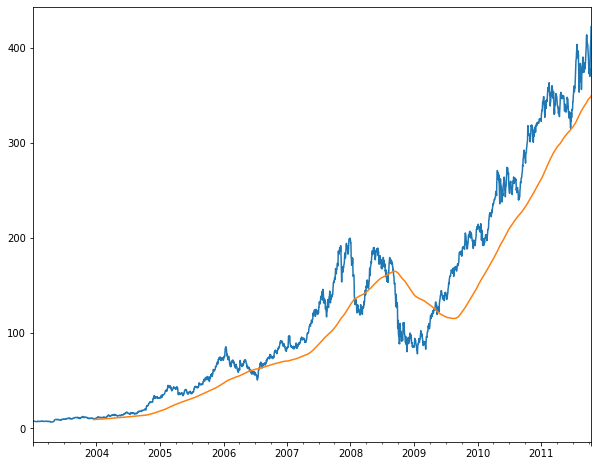

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
close_px.AAPL.plot()
#rolling groupby is similar to the groupby but it create a object that enables us to create an object of 250 days sliding 
#windows.
#so here we have 250 days moving window average of Apple's stock price 
close_px.AAPL.rolling(250).mean().plot()

In [8]:
close_px.rolling(250).mean()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2011-10-10,347.58772,25.89980,77.20304,1266.44128
2011-10-11,347.95668,25.90676,77.24824,1266.48088
2011-10-12,348.33412,25.91296,77.30036,1266.58008
2011-10-13,348.74688,25.91912,77.34720,1266.65960


In [9]:
close_px.rolling(250).mean().isnull().sum()

AAPL    249
MSFT    249
XOM     249
SPX     249
dtype: int64

In [10]:
close_px.rolling(250).mean()[:12]

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN,NaN
2003-01-09,NaN,NaN,NaN,NaN
2003-01-10,NaN,NaN,NaN,NaN
2003-01-13,NaN,NaN,NaN,NaN
2003-01-14,NaN,NaN,NaN,NaN
2003-01-15,NaN,NaN,NaN,NaN


In [11]:
close_px.rolling(250).mean()[248:]

,AAPL,MSFT,XOM,SPX
2003-12-16,NaN,NaN,NaN,NaN
2003-12-17,9.22340,20.54224,30.06408,959.86080
2003-12-18,9.23388,20.54468,30.08068,960.58140
2003-12-19,9.24348,20.54688,30.09784,961.30168
2003-12-22,9.25340,20.54700,30.11168,961.95740
...,...,...,...,...
2011-10-10,347.58772,25.89980,77.20304,1266.44128
2011-10-11,347.95668,25.90676,77.24824,1266.48088
2011-10-12,348.33412,25.91296,77.30036,1266.58008
2011-10-13,348.74688,25.91912,77.34720,1266.65960


In [12]:
#by default require all the value in window to be non-nan.this behaviour can be changed on account for the missing data.
#this behaviour canbe changed to account for missing data and in perticular the fact 
#that you will have fewer than windows period of data at the biggining of the time series.
close_px.AAPL.rolling(250,min_periods=10).mean()[:13]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    7.355000
2003-01-16    7.350909
2003-01-17    7.325833
2003-01-20    7.304615
Freq: B, Name: AAPL, dtype: float64

In [13]:
close_px.AAPL.rolling(10).mean()[:13]

2003-01-02      NaN
2003-01-03      NaN
2003-01-06      NaN
2003-01-07      NaN
2003-01-08      NaN
2003-01-09      NaN
2003-01-10      NaN
2003-01-13      NaN
2003-01-14      NaN
2003-01-15    7.355
2003-01-16    7.346
2003-01-17    7.306
2003-01-20    7.266
Freq: B, Name: AAPL, dtype: float64

In [14]:
#you can see the difference between rolling and shifting from here
close_px.AAPL.shift(10)[:13]

2003-01-02     NaN
2003-01-03     NaN
2003-01-06     NaN
2003-01-07     NaN
2003-01-08     NaN
2003-01-09     NaN
2003-01-10     NaN
2003-01-13     NaN
2003-01-14     NaN
2003-01-15     NaN
2003-01-16    7.40
2003-01-17    7.45
2003-01-20    7.45
Freq: B, Name: AAPL, dtype: float64

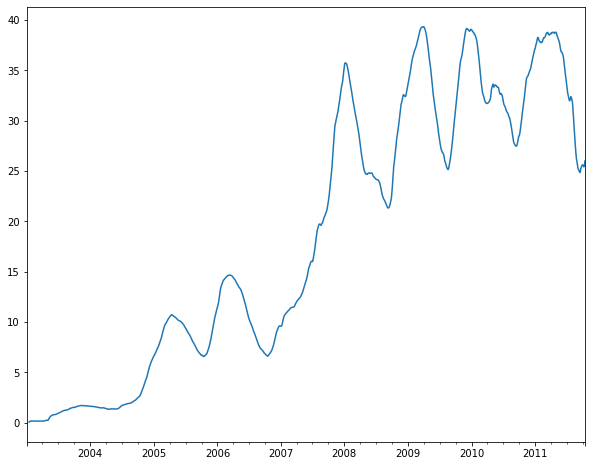

In [15]:
plt.figure(figsize=(10,8))
close_px.AAPL.rolling(250,min_periods=10).std().plot()

In order to compute an expanding window mean,use expanding operator instead of rolling mean operator.the expanding mean start from the biggining of the time series and continious increase the size of the window untill it encompasses thewhole series

In [16]:

close_px.AAPL.expanding().mean()

2003-01-02      7.400000
2003-01-03      7.425000
2003-01-06      7.433333
2003-01-07      7.432500
2003-01-08      7.402000
                 ...    
2011-10-10    124.845337
2011-10-11    124.965671
2011-10-12    125.086729
2011-10-13    125.210406
2011-10-14    125.339895
Freq: B, Name: AAPL, Length: 2292, dtype: float64

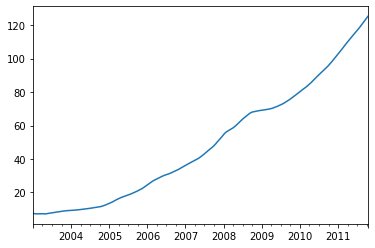

In [17]:
close_px.AAPL.expanding().mean().plot()

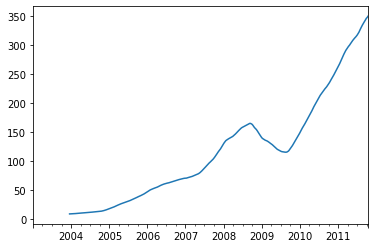

In [18]:
#you can see the expanding and the rolling mean
close_px.AAPL.rolling(250).mean().plot()

In [19]:
close_px

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


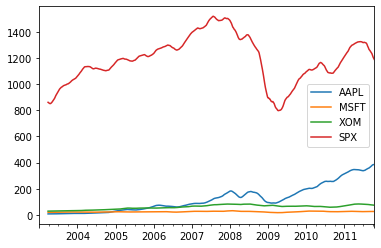

In [20]:
close_px.rolling(60).mean().plot()

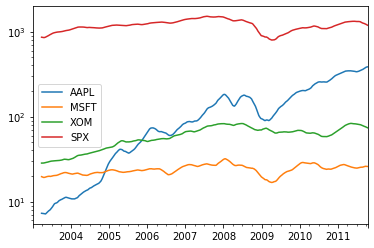

In [21]:
close_px.rolling(60).mean().plot(logy=True)

In [22]:
close_pxx=close_px[['AAPL','MSFT','XOM']]
close_pxx.head(20)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [23]:
close_pxx.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [24]:
close_pxx.rolling('20D').mean().head(10)

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


In [25]:
import pandas as pd
import numpy as np
df=pd.DataFrame(np.arange(10).reshape(10,1)+5,index=pd.date_range('1/1/2000',periods=10),columns=['data'])
df

,data
2000-01-01,5
2000-01-02,6
2000-01-03,7
2000-01-04,8
2000-01-05,9
2000-01-06,10
2000-01-07,11
2000-01-08,12
2000-01-09,13
2000-01-10,14


In [26]:
#6=(5+6+7)/3,7=(6+7+8)/3 so on...
df.rolling(3).mean()

,data
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,6.0
2000-01-04,7.0
2000-01-05,8.0
2000-01-06,9.0
2000-01-07,10.0
2000-01-08,11.0
2000-01-09,12.0
2000-01-10,13.0


In [27]:
#7=(5+6+7+8+9)/5,8=(6+7+8+9+10)....
df.rolling(5).mean()

,data
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,7.0
2000-01-06,8.0
2000-01-07,9.0
2000-01-08,10.0
2000-01-09,11.0
2000-01-10,12.0


In [28]:
df.rolling(5,min_periods=2).mean()

,data
2000-01-01,NaN
2000-01-02,5.5
2000-01-03,6.0
2000-01-04,6.5
2000-01-05,7.0
2000-01-06,8.0
2000-01-07,9.0
2000-01-08,10.0
2000-01-09,11.0
2000-01-10,12.0


In [29]:
#5.0-->(5/1),5.5-->(5+6)/2,6.0-->(5+6+7)/3,6.5-->(5+6+7+8)/4..so on
df.expanding().mean()

,data
2000-01-01,5.0
2000-01-02,5.5
2000-01-03,6.0
2000-01-04,6.5
2000-01-05,7.0
2000-01-06,7.5
2000-01-07,8.0
2000-01-08,8.5
2000-01-09,9.0
2000-01-10,9.5


In [30]:
#5-->5/1,5.5-->(5+6)/2,6.5-->(6+7)/2,7.5-->(7+8)/2,8.5-->(8+9)/2,9.5-->(9+10)/2
df.rolling('2D').mean()

,data
2000-01-01,5.0
2000-01-02,5.5
2000-01-03,6.5
2000-01-04,7.5
2000-01-05,8.5
2000-01-06,9.5
2000-01-07,10.5
2000-01-08,11.5
2000-01-09,12.5
2000-01-10,13.5


In [31]:
#5-->5/1,5.5-->(5+6)/2,6.0-->(5+6+7)/3,7.0-->(6+7+8)/3,8.0-->(7+8+9)/3,9.0-->(8+9+10)/3..so on
df.rolling('3D').mean()

,data
2000-01-01,5.0
2000-01-02,5.5
2000-01-03,6.0
2000-01-04,7.0
2000-01-05,8.0
2000-01-06,9.0
2000-01-07,10.0
2000-01-08,11.0
2000-01-09,12.0
2000-01-10,13.0


In [32]:
#5-->5/1,5.5-->(5+6)/2,6.0-->(5+6+7)/3,6.5-->(5+6+7+8)/4,7.0-->(5+6+7+8+9)/5,8.0-->(6+7+8+9+10)/5,9.0-->(7+8+9+10+11)/5 .. so on
df.rolling('5D').mean()

,data
2000-01-01,5.0
2000-01-02,5.5
2000-01-03,6.0
2000-01-04,6.5
2000-01-05,7.0
2000-01-06,8.0
2000-01-07,9.0
2000-01-08,10.0
2000-01-09,11.0
2000-01-10,12.0


# Expontially Weighted Function

EWMA solve this problem with a recursive formula:S(t)=a.X(t)+(1-a)S(t-1),

Formula explanation:The formula states that the value of the moving average (S) at the time t is a mix between the the value of row signal(x) at time t and previous value of the moving average itself i.e t-1,the  degree of mixing is controlled by the parameter a value(between 0-1) so if a=10% most of the contribution will come from the previous value of the signal.in this case soothing will be very strong.if a=90%,most of the contribytion will come from the current value of the signal.in this case sshothing will be minimum.

In [50]:
df['exp.mean()']=df.ewm(span=6).mean()

In [51]:
2/7

0.2857142857142857

In [52]:
df

,data,exp.mean()
2000-01-01,5,5.000000
2000-01-02,6,5.583333
2000-01-03,7,6.220183
2000-01-04,8,6.907658
2000-01-05,9,7.642011
2000-01-06,10,8.418901
2000-01-07,11,9.233649
2000-01-08,12,10.081484
2000-01-09,13,10.957758
2000-01-10,14,11.858096


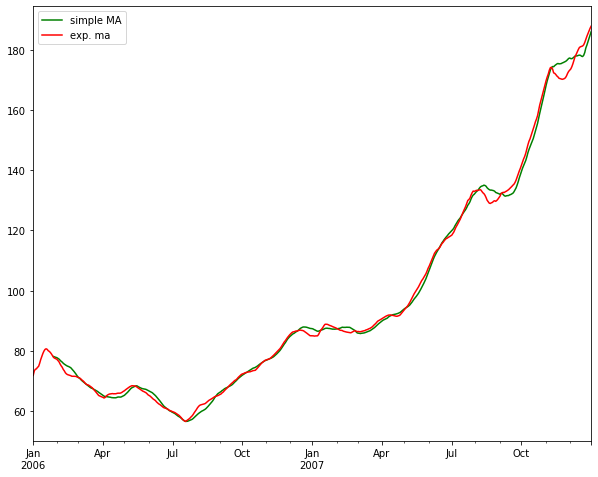

In [35]:
apple_px=close_pxx.AAPL['2006':'2007']
plt.figure(figsize=(10,8))
ma60=apple_px.rolling(30,min_periods=20).mean()
ema60=apple_px.ewm(span=30).mean()
ma60.plot(style='g-',label='simple MA')
ema60.plot(style='r-',label='exp. ma')
plt.legend()

Some statistical operator like corelation co variance are need to operate on the two time series

In [53]:
close_px

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [55]:
spx_px=close_px['SPX']
spx_px

2003-01-02     909.03
2003-01-03     908.59
2003-01-06     929.01
2003-01-07     922.93
2003-01-08     909.93
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Freq: B, Name: SPX, Length: 2292, dtype: float64

In [57]:
spx_rets=spx_px.pct_change()
spx_rets

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Freq: B, Name: SPX, Length: 2292, dtype: float64

In [58]:
return_=close_px.pct_change()
return_

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [59]:
corr=return_.AAPL.rolling(125,min_periods=100).corr(spx_rets)

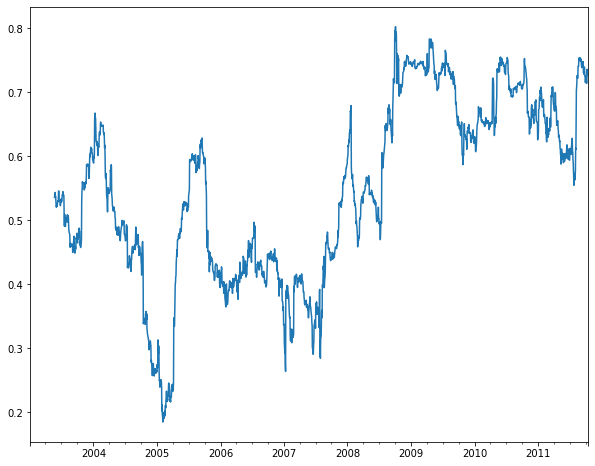

In [69]:
plt.figure(figsize=(10,8))
corr.plot()

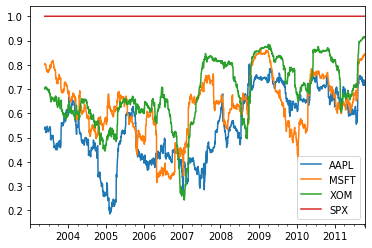

In [74]:
return_.rolling(125,min_periods=100).corr(spx_rets).plot()

# User defined moving average method

In [77]:
close_px.rolling(250).quantile(0.02)

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2011-10-10,306.7002,23.8492,66.2326,1123.9474
2011-10-11,306.7002,23.8492,66.3676,1123.9474
2011-10-12,306.7002,23.8492,67.7126,1123.9474
2011-10-13,307.0338,23.8492,67.7498,1123.9474


In [79]:
from scipy.stats import percentileofscore

In [80]:
percentileat2percent=lambda x:percentileofscore(x,0.02)

In [82]:
result=return_.AAPL.rolling(250).apply(percentileat2percent)

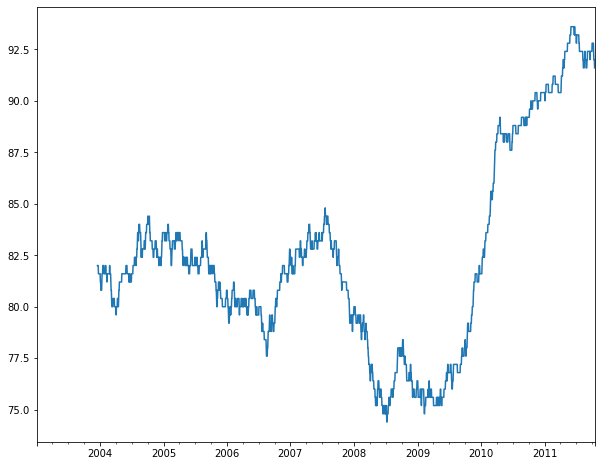

In [84]:
plt.figure(figsize=(10,8))
result.plot()

In [85]:
set_year=lambda x:x.year

In [86]:
set_corr=lambda x:x.corrwith(x['SPX'])

In [87]:
close_px.groupby(set_year).apply(set_corr)

,AAPL,MSFT,XOM,SPX
2003,0.880600,0.675171,0.862196,1.0
2004,0.643394,0.596009,0.441353,1.0
2005,0.751353,0.749425,0.401785,1.0
2006,0.830912,0.824301,0.853454,1.0
2007,0.480498,0.282465,0.724823,1.0
2008,0.830270,0.918203,0.772814,1.0
2009,0.950819,0.950413,0.264701,1.0
2010,0.618876,0.467781,0.894702,1.0
2011,-0.556496,0.108243,0.912537,1.0
